# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
import japanize_matplotlib
import ipywidgets as widgets

%matplotlib inline

In [2]:
# const
# csv_filepath
master_csv = "csv/score_data.csv"
# header
head_row = ["国語", "数学", "英語", "社会", "理科"]
head_mean = ["国語(平均)", "数学(平均)", "英語(平均)", "社会(平均)", "理科(平均)"]
header = head_row + head_mean
# concat_const
keys = header
ignore_index = True
# glaph_const
nrows = 1
ncols = 5
figsize_1 = (20, 5)
figsize_2 = (20, 10)
dpi = 72
xlabel = "第何回"
ylabel = "得点"
# header
head_row = ["国語", "数学", "英語", "社会", "理科"]
head_mean = ["国語(平均)", "数学(平均)", "英語(平均)", "社会(平均)", "理科(平均)"]
header = head_row + head_mean
# subject_list, score_dict -> init
subjects = []
subjects_mean = []
score_dict = {}
# score_min_max
min_score = 0
max_score = 100

# make data

In [3]:
def input_data():
    
    # make textbox(widgets)
    for subject in head_row:
        score = widgets.BoundedIntText(min=min_score, max=max_score, description=subject)
        subjects.append(score)
    for subject_mean in head_mean:
        score = widgets.BoundedIntText(min=min_score, max=max_score, description=subject_mean)
        subjects_mean.append(score)

    # input
    for i in range(len(head_row)):
        box = widgets.Box([subjects[i], subjects_mean[i]])
        display(box)
    
    return (subjects, subjects_mean)

In [4]:
def make_score_dict(subjects, subjects_mean):
    
    # make score_dict
    for i in range(len(head_row)):
        score_dict[subjects[i].description] = subjects[i].value
    for i in range(len(head_mean)):
        score_dict[subjects_mean[i].description] = subjects_mean[i].value
    
    return score_dict

In [5]:
# 得点入力
subjects, subjects_mean = input_data()

Box(children=(BoundedIntText(value=0, description='国語'), BoundedIntText(value=0, description='国語(平均)')))

Box(children=(BoundedIntText(value=0, description='数学'), BoundedIntText(value=0, description='数学(平均)')))

Box(children=(BoundedIntText(value=0, description='英語'), BoundedIntText(value=0, description='英語(平均)')))

Box(children=(BoundedIntText(value=0, description='社会'), BoundedIntText(value=0, description='社会(平均)')))

Box(children=(BoundedIntText(value=0, description='理科'), BoundedIntText(value=0, description='理科(平均)')))

In [6]:
# 得点反映
input_data = make_score_dict(subjects, subjects_mean)

# score_visualization

In [7]:
# 得点の表示
master_df = pd.read_csv(master_csv)
new_df = pd.DataFrame(score_dict, index=[0])  # value is the int data type -> index=[0]
output_df = pd.concat([master_df, new_df], ignore_index=ignore_index)

print("---前回までの得点表---")
display(master_df)
print()
print("---今回追加分の得点表---")
display(new_df)
print()
print("---得点表---")
display(output_df)
print()

---前回までの得点表---


,国語,数学,英語,社会,理科,国語(平均),数学(平均),英語(平均),社会(平均),理科(平均)
0,0,0,0,0,0,0,0,0,0,0
1,40,50,80,80,90,30,50,30,90,100



---今回追加分の得点表---


,国語,数学,英語,社会,理科,国語(平均),数学(平均),英語(平均),社会(平均),理科(平均)
0,10,40,30,0,0,20,50,0,0,0



---得点表---


,国語,数学,英語,社会,理科,国語(平均),数学(平均),英語(平均),社会(平均),理科(平均)
0,0,0,0,0,0,0,0,0,0,0
1,40,50,80,80,90,30,50,30,90,100
2,10,40,30,0,0,20,50,0,0,0


In [8]:
def score_transition(score_dict, output_df):
    
    # glaph type1
    df = output_df
    x = [i+1 for i in df.iloc[:, :ncols].index]
    y = [i for i in range(min_score, max_score+10, 10)]
    fig_1, axes = plt.subplots(nrows, ncols, figsize=figsize_1)
    for i, subject in enumerate(df.iloc[:, :ncols].columns):
        y1 = df[subject]
        y2 = df[subject+head_mean[0][2:]]
        axes[i].plot(x, y1, label=subject, color="b", marker="o")
        axes[i].plot(x, y2, label=subject, color="g", marker="o")
        axes[i].set_title(subject)
        axes[i].set_xticks(x)
        axes[i].set_yticks(y)
        axes[i].set_xlabel(xlabel)
        if i > 0:
            continue
        else:
            axes[i].set_ylabel(ylabel)
    plt.show()
    print()
    
    # glaph type2
    fig_2 = plt.figure(figsize=figsize_2, dpi=dpi)
    ax = fig_2.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title="")
    ax.plot(x, df[df.columns[0]], label=df.columns[0], color="r", marker="o")
    ax.plot(x, df[df.columns[1]], label=df.columns[1], color="b", marker="o")
    ax.plot(x, df[df.columns[2]], label=df.columns[2], color="m", marker="o")
    ax.plot(x, df[df.columns[3]], label=df.columns[3], color="y", marker="o")
    ax.plot(x, df[df.columns[4]], label=df.columns[4], color="g", marker="o")
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax.legend()
    plt.show()

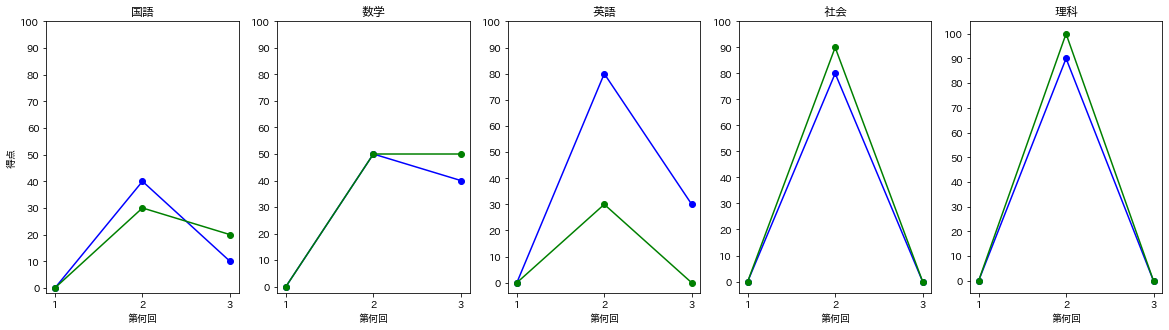

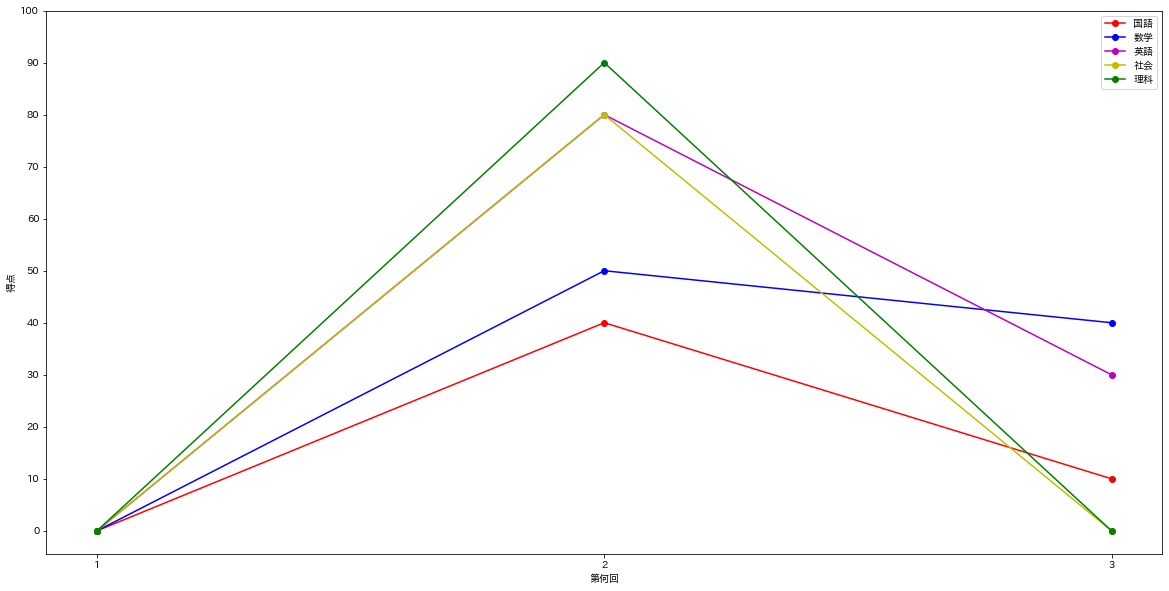

In [9]:
# 得点の推移
kobayashi_output = score_transition(input_data, output_df)

# save data

In [ ]:
# 保存
output_df.to_csv(master_csv, index=False)

In [ ]:
# 中身確認
conf_data = pd.read_csv(master_csv)
conf_data